In [1]:
import pandas as pd

# Advanced Aggregations & GroupBY

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
avg_fare = df.groupby(['Pclass','Sex'])['Fare'].agg(['mean','median','count','max','min']).reset_index()
print(avg_fare)

   Pclass     Sex        mean    median  count       max      min
0       1  female  115.591168  79.02500     50  512.3292  25.7000
1       1    male   75.586551  51.86250     57  262.3750   0.0000
2       2  female   26.438750  26.00000     30   65.0000  10.5000
3       2    male   20.184654  13.00000     63   73.5000   9.6875
4       3  female   13.735129   8.08125     72   69.5500   6.9500
5       3    male   11.826350   7.89580    145   69.5500   3.1708


In [4]:
# Survival Rate by Gender and Class
survival_rate = df.groupby(['Pclass','Sex'])['Survived'].mean().reset_index()
survival_rate.rename(columns={'Survived': 'SurvivedRate'}, inplace=True)
print(survival_rate)

   Pclass     Sex  SurvivedRate
0       1  female           1.0
1       1    male           0.0
2       2  female           1.0
3       2    male           0.0
4       3  female           1.0
5       3    male           0.0


### Age statistics by Embarked Port

In [5]:
age_stats = df.groupby('Embarked')['Age'].agg(['mean','count','std']).reset_index()
print(age_stats)

  Embarked       mean  count        std
0        C  34.737805     82  14.747510
1        Q  29.318182     22  12.627017
2        S  28.758772    228  13.830944


#### Visualizing Aggregated Data


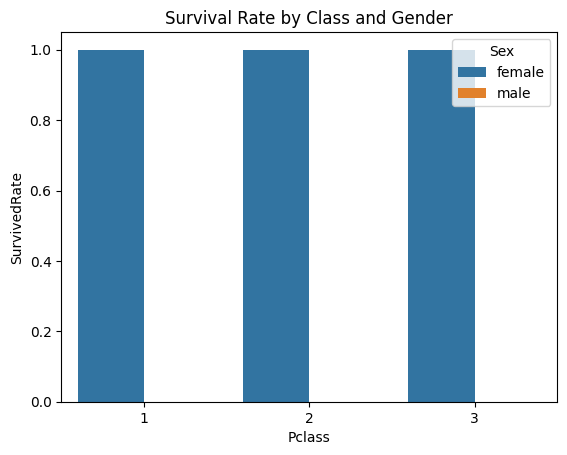

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=survival_rate, x='Pclass', y='SurvivedRate',hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.savefig('survival.png')
plt.show()